# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

Dataset yang digunakan pada proyek ini adalah Heart Disease Dataset yang diperoleh dari platform Kaggle. Dataset ini berisi data klinis pasien yang digunakan untuk memprediksi kemungkinan seseorang mengalami penyakit jantung.

Dataset terdiri dari beberapa fitur numerik dan kategorikal yang merepresentasikan kondisi kesehatan pasien, serta satu variabel target yang menunjukkan keberadaan penyakit jantung.

Tujuan dari proyek ini adalah membangun model machine learning untuk melakukan klasifikasi penyakit jantung berdasarkan fitur-fitur klinis pasien.

Dataset ini terdiri dari 14 kolom, yang merepresentasikan kondisi klinis pasien, yaitu:

age: Usia pasien dalam satuan tahun.

sex: Jenis kelamin pasien
(1 = laki-laki, 0 = perempuan).

cp (chest pain type): Jenis nyeri dada yang dialami pasien.

trestbps: Tekanan darah saat istirahat (dalam mm Hg).

chol: Kadar kolesterol serum dalam mg/dl.

fbs (fasting blood sugar): Gula darah puasa > 120 mg/dl
(1 = benar, 0 = salah).

restecg: Hasil elektrokardiografi saat istirahat.

thalach: Detak jantung maksimum yang dicapai pasien.

exang: Angina yang dipicu oleh aktivitas fisik
(1 = ya, 0 = tidak).

oldpeak: Penurunan segmen ST yang diinduksi oleh aktivitas fisik dibandingkan kondisi istirahat.

slope: Kemiringan segmen ST pada puncak aktivitas fisik.

ca: Jumlah pembuluh darah utama (0–3) yang terwarnai oleh fluoroskopi.

thal: Status thalassemia
(1 = normal, 2 = fixed defect, 3 = reversible defect).

target: Variabel target yang menunjukkan keberadaan penyakit jantung
(1 = memiliki penyakit jantung, 0 = tidak).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#load data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

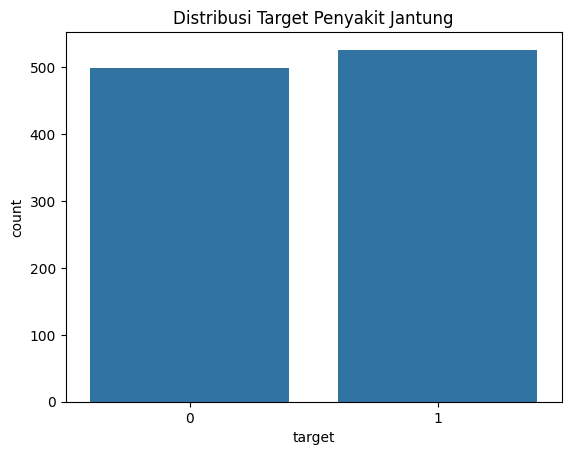

In [6]:
#dist target
sns.countplot(x='target', data=df)
plt.title("Distribusi Target Penyakit Jantung")
plt.show()

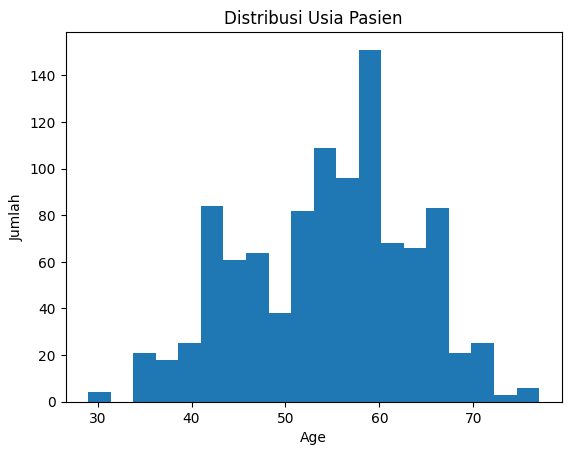

In [7]:
#dist usia
plt.hist(df['age'], bins=20)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Age")
plt.ylabel("Jumlah")
plt.show()

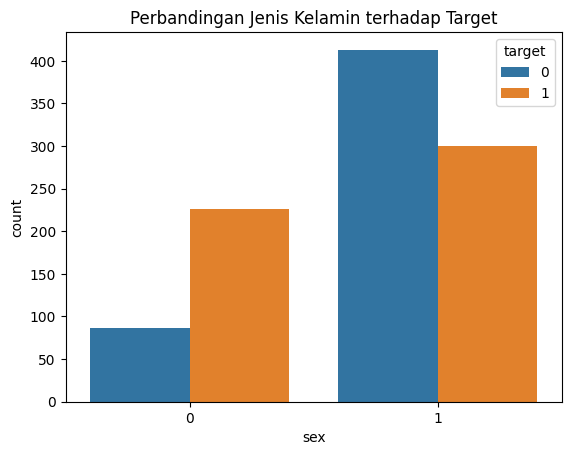

In [8]:
#perbandingan jenis kelamin
sns.countplot(x='sex', hue='target', data=df)
plt.title("Perbandingan Jenis Kelamin terhadap Target")
plt.show()

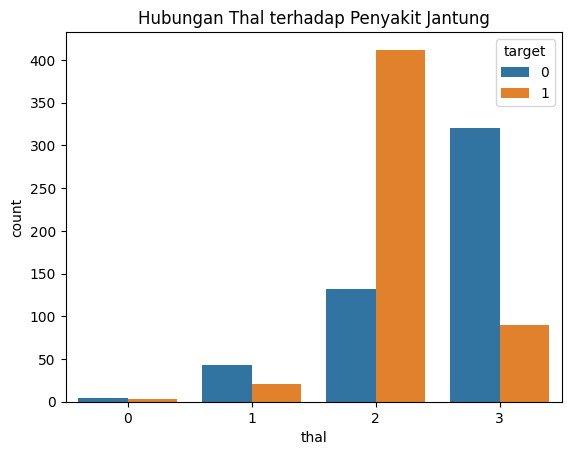

In [9]:
sns.countplot(x='thal', hue='target', data=df)
plt.title("Hubungan Thal terhadap Penyakit Jantung")
plt.show()

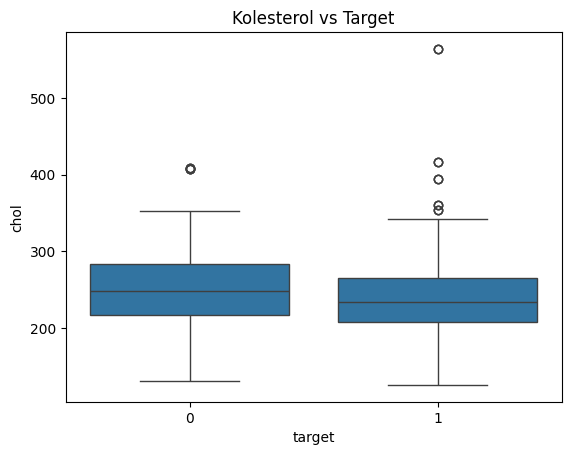

In [10]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Kolesterol vs Target")
plt.show()

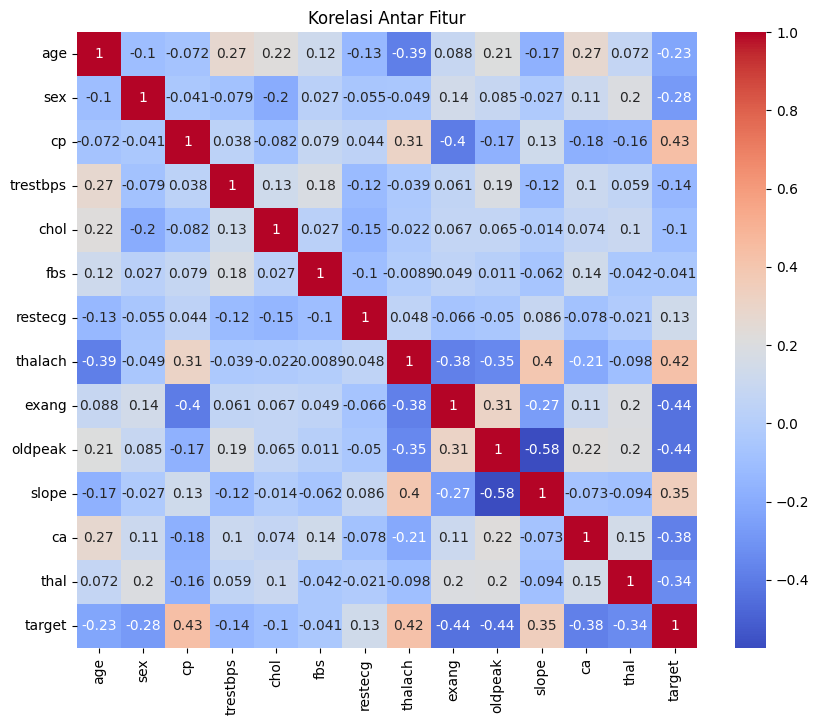

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
#cek nilai kosong
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Berdasarkan hasil pengecekan, dataset tidak memiliki nilai kosong (missing values), sehingga tidak diperlukan penanganan lebih lanjut pada tahap ini.

In [13]:
#cek data duplikat
df.duplicated().sum()

np.int64(723)

In [14]:
#mengatasi data duplikat
df = df.drop_duplicates()

In [15]:
#pisahkan fitur dan targert
X = df.drop('target', axis=1)
y = df['target']

In [16]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
df.shape

(302, 14)

In [19]:
df_processed = df.copy()

In [20]:
#encoding categorical
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

In [21]:
#scaling numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [22]:
df_processed.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,2,0,True,False,False,False,False,True,False,False,False,True,False,False,True
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,True,False,False,False,True,False,False,True,False,False,False,False,True
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,True,False,False,False,False,True,False,True,False,False,False,False,True
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,1,0,True,False,False,False,False,True,False,False,False,True,False,False,True
4,0.839089,0.364848,0.919336,-1.905464,0.739054,3,0,False,False,False,False,True,True,False,False,True,False,False,True,False


In [23]:
df_processed.isnull().sum().sum()

np.int64(0)

In [24]:
df_processed.dtypes

,0
age,float64
trestbps,float64
chol,float64
thalach,float64
oldpeak,float64
ca,int64
target,int64
sex_1,bool
cp_1,bool
cp_2,bool


In [25]:
df_processed.to_csv("heart_preprocessed.csv", index=False)